# Logistic Regression

## 1. Predicting a continuous response
- Using linear regression model

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
# glass.sort('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [3]:
len(glass)

214

In [4]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Text(0, 0.5, 'household')

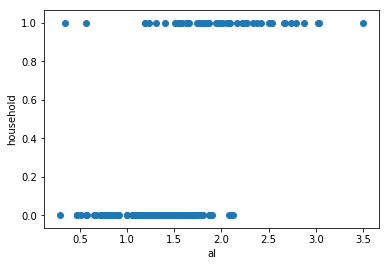

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(glass['al'], glass['household'])
plt.xlabel('al')
plt.ylabel('household')

In [6]:
# fit a linear regression model and store the predictions
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

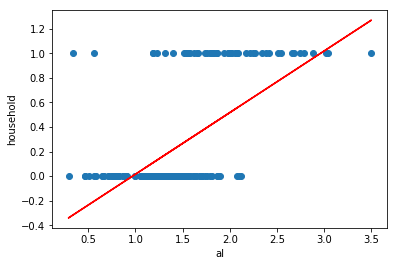

In [7]:
# scatter plot that includes the regression line
plt.scatter(glass['al'], glass['household'])
plt.plot(glass['al'], glass['household_pred'], color='red')
plt.xlabel('al')
plt.ylabel('household')

## 2. Predicting a categorical response
- Using logistic regression

In [8]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
glass.head(5)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0.135623,0


In [10]:
# First column: predicted probability of class 0
# Second column: predicted probability of class 1
print(logreg.predict_proba(X))

[[9.57512963e-01 4.24870368e-02]
 [8.83729869e-01 1.16270131e-01]
 [7.81727605e-01 2.18272395e-01]
 [9.10590269e-01 8.94097310e-02]
 [9.26210406e-01 7.37895944e-02]
 [7.19368281e-01 2.80631719e-01]
 [9.50165283e-01 4.98347166e-02]
 [9.65248419e-01 3.47515807e-02]
 [8.79365064e-01 1.20634936e-01]
 [8.83729869e-01 1.16270131e-01]
 [7.67126168e-01 2.32873832e-01]
 [9.17167650e-01 8.28323504e-02]
 [8.65415687e-01 1.34584313e-01]
 [9.17167650e-01 8.28323504e-02]
 [9.03545531e-01 9.64544686e-02]
 [9.29017074e-01 7.09829263e-02]
 [9.46053995e-01 5.39460046e-02]
 [9.81890179e-01 1.81098214e-02]
 [9.41624370e-01 5.83756296e-02]
 [6.56717894e-01 3.43282106e-01]
 [8.15293899e-01 1.84706101e-01]
 [9.98500716e-01 1.49928375e-03]
 [9.10590269e-01 8.94097310e-02]
 [8.87956869e-01 1.12043131e-01]
 [9.48148145e-01 5.18518549e-02]
 [9.34336646e-01 6.56633537e-02]
 [8.60471912e-01 1.39528088e-01]
 [8.96009117e-01 1.03990883e-01]
 [8.50128209e-01 1.49871791e-01]
 [9.13935859e-01 8.60641409e-02]
 [9.071278

In [11]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [12]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1,0,0.065459,0,0.042487
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,0,0.195765,0,0.116270
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,0,0.285976,0,0.218272
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,0,0.160682,0,0.089410
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,0,0.135623,0,0.073790
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,0,0.326071,0,0.280632
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1,0,0.085506,0,0.049835
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1,0,0.040400,0,0.034752
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1,0,0.200776,0,0.120635


Text(0, 0.5, 'household')

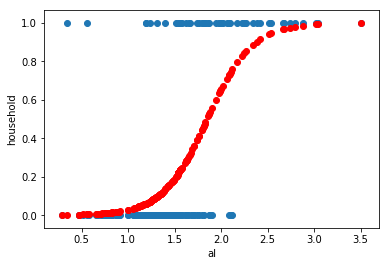

In [13]:
# plot the predicted probabilities
plt.scatter(glass['al'], glass['household'])
plt.scatter(glass['al'], glass['household_pred_prob'], color='red')
plt.xlabel('al')
plt.ylabel('household')

## 3. Training the model using all input variables

In [14]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1,0,0.065459,0,0.042487
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,0,0.195765,0,0.116270
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,0,0.285976,0,0.218272
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,0,0.160682,0,0.089410
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,0,0.135623,0,0.073790
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,0,0.326071,0,0.280632
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1,0,0.085506,0,0.049835
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1,0,0.040400,0,0.034752
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1,0,0.200776,0,0.120635


In [15]:
feature_cols = ['ri','na','mg','al','si','k','ca','ba','fe']
X = glass[feature_cols]
y = glass['household']

In [18]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_hat = logreg.predict(X)

C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y,y_hat)

0.9345794392523364

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1234)

In [23]:
logreg.fit(X_train, y_train)
y_train_hat = logreg.predict(X_train)
y_test_hat = logreg.predict(X_test)

C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print(accuracy_score(y_train, y_train_hat))
print(accuracy_score(y_test, y_test_hat))

0.9395973154362416
0.9230769230769231


In [25]:
logreg.coef_

array([[-1.52552014e-03,  6.82463394e-01, -1.77197178e+00,
         1.47629141e+00, -5.37233799e-02, -3.44949399e-01,
        -4.66771730e-01,  8.52858285e-01, -2.90503599e-01]])

In [26]:
X.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe'], dtype='object')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.78      0.93      0.85        15

   micro avg       0.92      0.92      0.92        65
   macro avg       0.88      0.93      0.90        65
weighted avg       0.93      0.92      0.93        65

